In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [74]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
inspector = inspect(engine)


# reflect the tables
tables = inspector.get_table_names()
tables

['measurement', 'station']

In [6]:
# View all of the classes that automap found

lst1=[]
# lst2=[]
for table in tables:
    columns = inspector.get_columns(table)
    print(table)
#     df1=df1.append(table)
    for column in columns:
        print(column["name"], column["type"])
    
    # or put it as a dataframe
    lst1.append(pd.DataFrame(columns))
    lst1.append(column)
    
    print()
lst1[0]

measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,date,TEXT,True,None,auto,0
3,prcp,FLOAT,True,None,auto,0
4,tobs,FLOAT,True,None,auto,0


In [7]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Dow = Base.classes.measurement

In [8]:
Dow

sqlalchemy.ext.automap.measurement

In [9]:
session = Session(engine)

In [10]:
var2 = session.query(Dow.date).all()

In [11]:
var1= list(np.ravel(var2))

In [12]:
var1[-1]

'2017-08-23'

In [13]:
# Create our session (link) from Python to the DB
query = """
        select *
        from measurement;
        """

df = pd.read_sql(query, conn)

df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [14]:
query = """
        select *
        from station
        limit 10;
        """

df = pd.read_sql(query, conn)

df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.

query = "SELECT max(date) from measurement;"

df=pd.read_sql(query, conn)

df.head()

,max(date)
0,2017-08-23


<AxesSubplot:xlabel='date'>

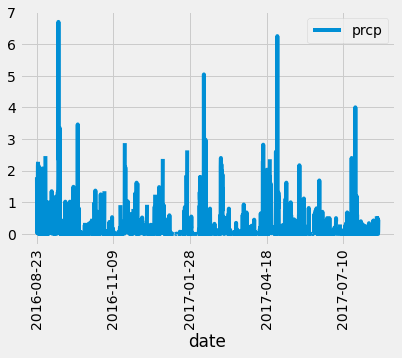

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


query = """
        select date, prcp
        from measurement
        where date >='2016-08-23';
        """

df = pd.read_sql(query, conn)

df
# Calculate the date one year from the last date in data set.
year1=dt.date(2017,8,23)-dt.timedelta(days=365)
year1
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date

#df=df.sort_values("date")
df.sort_values("date", inplace=True)


# Use Pandas Plotting with Matplotlib to plot the data


# plt.bar(df.date, df.prcp, color='firebrick', alpha=0.5, align="center")

# # Sets the x limits of the current chart
# plt.xlim(-0.75, len(x_axis)-0.25)

# # Sets the y limits of the current chart
# plt.ylim(0, max(users)+5000)

# Give our chart some labels and a tile
# plt.title("Precipitation Values from Last 12 Months")
# # plt.xlabel("Date")
# plt.ylabel("Precipitation Values")
df.plot(y="prcp", x="date", rot=90)


In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number stations in the dataset
query = """
        select count(station)
        from station;
        """

df = pd.read_sql(query, conn)

df

,count(station)
0,9


In [43]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

query = """
        SELECT s.station, count(m.id) as count
        from station s
        join measurement m on m.station = s.station
        group by s.station
        limit 20;
        """

df = pd.read_sql(query, conn)

df

# List the stations and the counts in descending order.
query = """
        SELECT s.station, count(m.id) as count
        from station s
        join measurement m on m.station = s.station
        group by s.station
        order by count desc
        limit 20;
        """

df = pd.read_sql(query, conn)

df

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [70]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = """
       
        
        SELECT *, MAX(m.tobs) as temperature1
        from station s
        join measurement m on m.station = s.station
        where m.station = 'USC00519281';
        """

df = pd.read_sql(query, conn)

df

query = """
       
        
        SELECT *, MIN(m.tobs) as temperature1
        from station s
        join measurement m on m.station = s.station
        where m.station = 'USC00519281';
        """

df = pd.read_sql(query, conn)

df

query = """
       
        
        SELECT *, AVG(m.tobs) as temperature1
        from station s
        join measurement m on m.station = s.station
        where m.station = 'USC00519281';
        """

df = pd.read_sql(query, conn)

df

,id,station,name,latitude,longitude,elevation,id,station,date,prcp,tobs,temperature1
0,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,12188,USC00519281,2010-01-01,0.15,70.0,71.663781


<AxesSubplot:xlabel='temperature', ylabel='Count'>

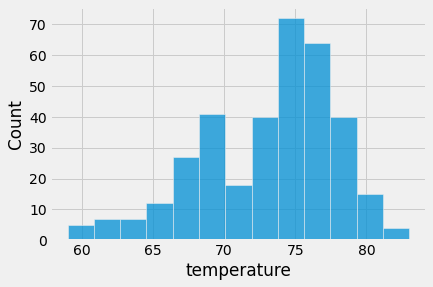

In [76]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = """
       
        
        SELECT s.station, m.tobs as temperature
        from station s
        join measurement m on m.station = s.station
        where m.station = 'USC00519281' and date between '2016-08-23' and '2017-08-23';
        """

df = pd.read_sql(query, conn)

df

sns.histplot(data=df, x="temperature")

# Close session

In [77]:
# Close Session
session.close()